# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [2]:
data = pd.read_csv('Categorical.csv')
data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
5,Aland,19.953288,60.214887,Europe
6,Andorra,1.560544,42.542291,Europe
7,United Arab Emirates,54.300167,23.905282,Asia
8,Argentina,-65.179807,-35.381349,South America
9,Armenia,44.929933,40.289526,Asia


Remove the duplicate index column from the dataset. 

In [3]:
# This seems to have already been done!

## Map the data

Use the <i>'continent'</i> category for this analysis.

In [4]:
data_mapped = data.copy()
data_mapped['continent'] = data_mapped['continent'].map( {'Africa':0, 'Antarctica':1, 'Asia':2, 'Europe':3, 'North America':4, 'Oceania':5,'Seven seas (open ocean)':6, 'South America':7} )
data_mapped

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,4
1,Afghanistan,66.004734,33.835231,2
2,Angola,17.537368,-12.293361,0
3,Anguilla,-63.064989,18.223959,4
4,Albania,20.049834,41.142450,3
5,Aland,19.953288,60.214887,3
6,Andorra,1.560544,42.542291,3
7,United Arab Emirates,54.300167,23.905282,2
8,Argentina,-65.179807,-35.381349,7
9,Armenia,44.929933,40.289526,2


## Select the features

In [5]:
# Clustering on Longitude, Latitude and continent.
data_cropped = data_mapped.iloc[:,1: ]
data_cropped

,Longitude,Latitude,continent
0,-69.982677,12.520880,4
1,66.004734,33.835231,2
2,17.537368,-12.293361,0
3,-63.064989,18.223959,4
4,20.049834,41.142450,3
5,19.953288,60.214887,3
6,1.560544,42.542291,3
7,54.300167,23.905282,2
8,-65.179807,-35.381349,7
9,44.929933,40.289526,2


## Clustering

Use 4 clusters initially.

In [18]:
kmeans = KMeans(8)
kmeans.fit(data_cropped)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [19]:
cluster_data = kmeans.fit_predict(data_cropped)
data_mapped['Cluster'] = cluster_data

In [20]:
data_mapped

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,4,0
1,Afghanistan,66.004734,33.835231,2,1
2,Angola,17.537368,-12.293361,0,7
3,Anguilla,-63.064989,18.223959,4,0
4,Albania,20.049834,41.142450,3,4
5,Aland,19.953288,60.214887,3,4
6,Andorra,1.560544,42.542291,3,4
7,United Arab Emirates,54.300167,23.905282,2,1
8,Argentina,-65.179807,-35.381349,7,0
9,Armenia,44.929933,40.289526,2,1


## Plot the data

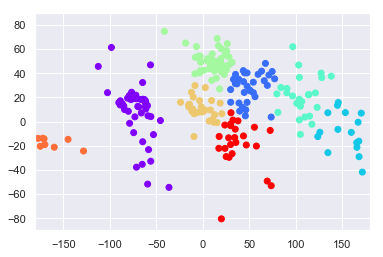

In [21]:
plt.scatter(data['Longitude'], data['Latitude'], c=data_mapped['Cluster'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()

Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.